# Visualizando Ranks

Observando distribuição dos canais com melhor desempenho para os chb do 01 ao 24.

Visão geral:
- para cada paciente (chb):
  - para cada um dos 18 canais:
    - usando apenas os atributos extraidos do espectivo canal:
      - é realizado 20 rodadas de classificação (treino e validação na proporção 70:30, respectivamente, com KNN);
        - a semente usada para calcular cada distribuição está em [./20_seeds.npy](./20_seeds.npy)
      - o resultado registrado numa matriz (rodada X canal);
      - de cada coluna (canal) é calculado média, desvio padrão e mediana, salvos no modelo abaixo, onde cada linha corresponde a uma combinação de chb e canal;

## Importando bibliotecas

,mean,std,50%,chb,channel
0,0.889615,0.026562,0.888462,1,0
1,0.919615,0.020802,0.915385,1,1
2,0.911154,0.019884,0.907692,1,2
3,0.936154,0.016000,0.934615,1,3
4,0.886538,0.025436,0.880769,1,4
...,...,...,...,...,...
427,0.927211,0.014321,0.931973,24,13
428,0.942177,0.016294,0.945578,24,14
429,0.890136,0.023594,0.887755,24,15
430,0.902041,0.021101,0.901361,24,16


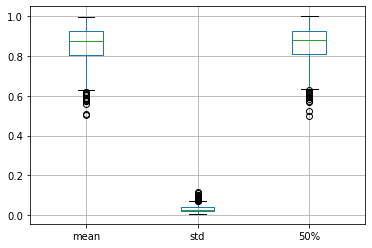

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# lista de str ['01', '02', ..., '24']
file_range = ['{:0>2}'.format(chb) for chb in range(1, 25)]

dataframe_list = [pd.read_csv(f'./chb{number}/knn_descr_channel_rank.csv') for number in file_range]

ranks_DF = pd.concat(dataframe_list, ignore_index=True)
ranks_DF.boxplot(column=['mean', 'std', '50%'])
ranks_DF

In [2]:
ranks_DF[['mean', 'std', '50%']].describe()

,mean,std,50%
count,432.000000,432.000000,432.000000
mean,0.853301,0.031550,0.854996
std,0.098464,0.018060,0.098498
min,0.505172,0.006073,0.500000
25%,0.805767,0.019330,0.808998
50%,0.876305,0.026281,0.880117
75%,0.924449,0.039840,0.926471
max,0.996324,0.115511,1.000000


## Convertendo a tabela longa para uma matriz (_chb_ X _canal_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
01,0.889615,0.919615,0.911154,0.936154,0.886538,0.934231,0.898462,0.913462,0.902308,0.950769,0.945769,0.922692,0.878462,0.930385,0.925000,0.922308,0.912308,0.913077
02,0.805882,0.887255,0.942157,0.933333,0.819608,0.750980,0.883333,0.914706,0.784314,0.812745,0.778431,0.739216,0.682353,0.863725,0.967647,0.894118,0.722549,0.817647
03,0.876271,0.910593,0.957203,0.966525,0.929661,0.949153,0.936864,0.939831,0.875000,0.927119,0.879661,0.954661,0.817797,0.858475,0.904661,0.955085,0.960593,0.961441
04,0.827232,0.835268,0.946875,0.945982,0.864732,0.907143,0.879018,0.940625,0.815179,0.859821,0.948661,0.955357,0.812500,0.876339,0.895982,0.926786,0.890179,0.890179
05,0.893939,0.919697,0.906061,0.898788,0.877576,0.882121,0.904242,0.912727,0.874848,0.871515,0.934242,0.951515,0.856667,0.922727,0.956970,0.959394,0.872121,0.895152
06,0.681707,0.846341,0.718293,0.640244,0.693902,0.718293,0.715854,0.604878,0.857317,0.753659,0.758537,0.659756,0.786585,0.751220,0.648780,0.693902,0.629268,0.735366
07,0.815625,0.905729,0.891146,0.874479,0.839583,0.929167,0.933854,0.939063,0.802604,0.913021,0.971354,0.925000,0.820312,0.931250,0.967187,0.927083,0.947917,0.932292
08,0.763736,0.831502,0.843590,0.862088,0.789560,0.832234,0.863919,0.888278,0.852198,0.887363,0.866850,0.880220,0.748352,0.845055,0.898352,0.848352,0.869048,0.902198
09,0.927160,0.961111,0.976543,0.966049,0.947531,0.968519,0.971605,0.959877,0.980864,0.985185,0.948148,0.971605,0.932099,0.959877,0.984568,0.962963,0.973457,0.976543
10,0.903817,0.966412,0.979389,0.940458,0.801527,0.858015,0.896183,0.907634,0.764122,0.794275,0.883969,0.888168,0.779008,0.875573,0.911832,0.900382,0.743511,0.814504


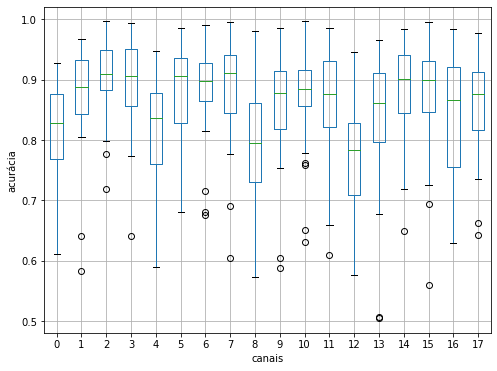

In [3]:
means_arr = np.zeros((18, 24))
for mean, chb, channel in ranks_DF[['mean', 'chb', 'channel']].values:
    column, row = int(chb-1), int(channel)
    means_arr[row][column] = mean

means_DF = pd.DataFrame(data=means_arr, columns=file_range).transpose()
means_DF.to_csv('./csvs/02-ranks.csv')

means_DF.boxplot(figsize=(8, 6)).set(xlabel='canais', ylabel='acurácia')
means_DF

## chb's ordenados pelos valores de média das médias

In [4]:
means_DF.mean().sort_values(ascending=False)

2     0.903815
3     0.892164
6     0.881860
14    0.881219
7     0.877158
15    0.877084
5     0.874088
1     0.873266
10    0.866504
11    0.863644
17    0.857127
9     0.852942
16    0.842913
13    0.829954
0     0.812648
4     0.811322
8     0.787807
12    0.773904
dtype: float64

In [5]:
means_DF.std()

0     0.090112
1     0.094123
2     0.068253
3     0.082584
4     0.097304
5     0.084490
6     0.085174
7     0.090777
8     0.097883
9     0.095761
10    0.091207
11    0.095968
12    0.102482
13    0.124380
14    0.086245
15    0.096996
16    0.106502
17    0.084362
dtype: float64

## Observando histograma com `ranks_DF` filtrado

Cada par de histograma mostra:
1. quantos canais cada chb possui com média acima de certa porcentagem.
2. quantos chb cada canal está presente com média acima de certa porcentagen

chb
1     18
15    18
3     18
4     18
5     18
19    18
7     18
9     18
24    17
22    17
20    16
23    15
8     15
10    14
12    14
13    13
11    13
17    13
2     12
14    11
18    11
21     4
16     2
6      2
dtype: int64


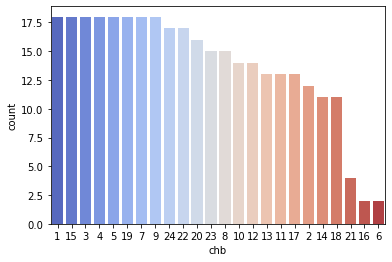

channel
1     22
2     21
15    21
7     21
6     21
3     21
17    20
14    20
11    20
10    19
9     19
5     19
13    18
16    17
4     16
0     15
8     12
12    11
dtype: int64


(333, 5)

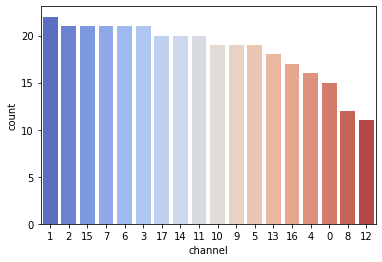

In [6]:
mean_over_80_percent = ranks_DF.query('mean >= 0.80')

print(mean_over_80_percent.value_counts(subset='chb'))
sns.countplot(
    data=mean_over_80_percent,
    x='chb',
    palette=sns.color_palette('coolwarm', len(file_range)),
    order=mean_over_80_percent.value_counts('chb').index
)

plt.show()

print(mean_over_80_percent.value_counts(subset='channel'))
sns.countplot(
    data=mean_over_80_percent,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=mean_over_80_percent.value_counts('channel').index
)

mean_over_80_percent.shape

chb
1     18
15    18
5     18
9     18
3     17
22    16
24    15
19    15
4     14
20    14
7     14
10    12
11    12
8     10
12    10
23     9
18     9
17     9
2      8
14     7
13     5
21     3
16     2
6      1
dtype: int64


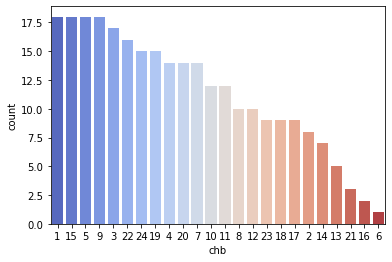

channel
6     20
2     20
3     19
14    18
10    18
15    17
11    17
17    16
1     16
9     16
7     16
5     16
13    15
16    15
0     11
4     10
8      8
12     6
dtype: int64


(274, 5)

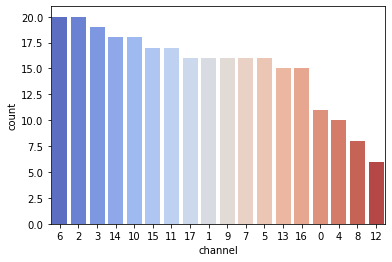

In [7]:
mean_over_85_percent = ranks_DF.query('mean >= 0.85')

print(mean_over_85_percent.value_counts(subset='chb'))
sns.countplot(
    data=mean_over_85_percent,
    x='chb',
    palette=sns.color_palette('coolwarm', len(file_range)),
    order=mean_over_85_percent.value_counts('chb').index
)

plt.show()

print(mean_over_85_percent.value_counts(subset='channel'))
sns.countplot(
    data=mean_over_85_percent,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=mean_over_85_percent.value_counts('channel').index
)

mean_over_85_percent.shape

chb
9     18
1     14
15    14
3     13
7     12
22    11
5      9
11     9
24     8
10     7
18     7
4      7
23     6
20     6
19     4
2      4
17     3
12     3
16     2
13     1
8      1
21     1
dtype: int64


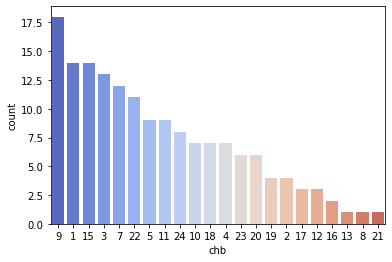

channel
2     14
7     13
5     13
3     12
14    12
15    11
1     11
6     11
11    10
13     9
10     9
17     8
9      8
16     8
0      3
4      3
12     3
8      2
dtype: int64


(160, 5)

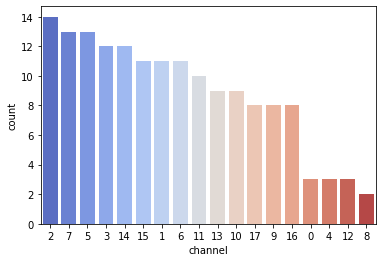

In [8]:
mean_over_90_percent = ranks_DF.query('mean >= 0.90')

print(mean_over_90_percent.value_counts(subset='chb'))
sns.countplot(
    data=mean_over_90_percent,
    x='chb',
    palette=sns.color_palette('coolwarm', len(file_range)),
    order=mean_over_90_percent.value_counts('chb').index
)

plt.show()

print(mean_over_90_percent.value_counts(subset='channel'))
sns.countplot(
    data=mean_over_90_percent,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=mean_over_90_percent.value_counts('channel').index
)

mean_over_90_percent.shape

chb
9     14
15    11
3      6
11     5
22     3
5      3
23     2
18     2
10     2
7      2
24     1
16     1
4      1
2      1
1      1
dtype: int64


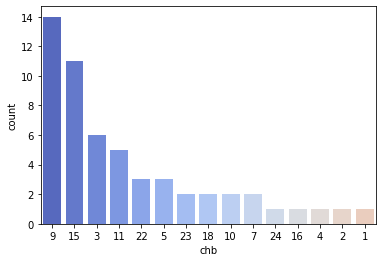

channel
3     6
2     6
16    5
14    5
11    5
1     5
15    4
6     4
7     3
5     3
17    2
13    2
10    2
9     2
8     1
dtype: int64


(55, 5)

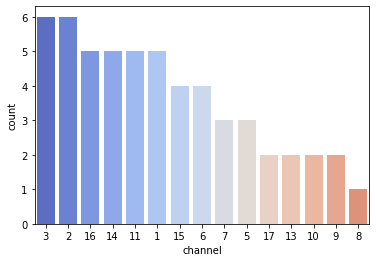

In [9]:
mean_over_95_percent = ranks_DF.query('mean >= 0.95')

print(mean_over_95_percent.value_counts(subset='chb'))
sns.countplot(
    data=mean_over_95_percent,
    x='chb',
    palette=sns.color_palette('coolwarm', len(file_range)),
    order=mean_over_95_percent.value_counts('chb').index
)

plt.show()

print(mean_over_95_percent.value_counts(subset='channel'))
sns.countplot(
    data=mean_over_95_percent,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=mean_over_95_percent.value_counts('channel').index
)

mean_over_95_percent.shape

## Observando histograma com _N_ primeiros de cada chb

channel
2     20
15    18
14    18
6     18
3     16
7     16
5     16
11    14
10    14
17    12
1     11
9     11
16    11
13    10
8      4
4      3
12     2
0      2
dtype: int64


(216, 5)

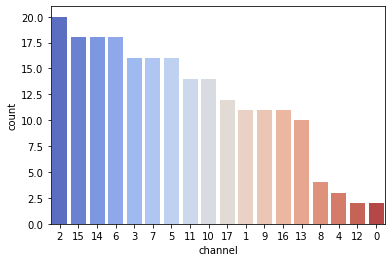

In [10]:
top9_per_dataframe_list = [top9.sort_values(by='mean', ascending=False).head(9) for top9 in dataframe_list]

rank_top9_DF = pd.concat(top9_per_dataframe_list, ignore_index=True)

print(rank_top9_DF.value_counts(subset='channel'))
sns.countplot(
    data=rank_top9_DF,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=rank_top9_DF.value_counts('channel').index
)

rank_top9_DF.shape

channel
3     14
14    13
2     13
15    12
7     12
10    11
6     10
9      8
13     8
1      8
5      7
17     7
16     7
11     7
8      3
12     2
0      2
dtype: int64


(144, 5)

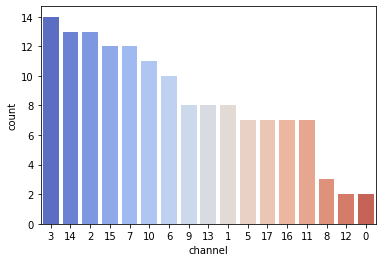

In [11]:
top6_per_dataframe_list = [top6.sort_values(by='mean', ascending=False).head(6) for top6 in dataframe_list]

rank_top6_DF = pd.concat(top6_per_dataframe_list, ignore_index=True)

print(rank_top6_DF.value_counts(subset='channel'))
sns.countplot(
    data=rank_top6_DF,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=rank_top6_DF.value_counts('channel').index
)

rank_top6_DF.shape

channel
2     8
14    8
3     8
10    6
17    5
9     5
11    4
16    4
7     4
6     4
1     4
5     3
12    2
8     2
13    2
15    2
0     1
dtype: int64


(72, 5)

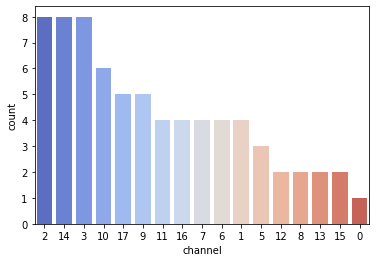

In [12]:
top3_per_dataframe_list = [top3.sort_values(by='mean', ascending=False).head(3) for top3 in dataframe_list]

rank_top3_DF = pd.concat(top3_per_dataframe_list, ignore_index=True)

print(rank_top3_DF.value_counts(subset='channel'))
sns.countplot(
    data=rank_top3_DF,
    x='channel',
    palette=sns.color_palette('coolwarm', 18),
    order=rank_top3_DF.value_counts('channel').index
)
rank_top3_DF.shape

## Conclusão

Pelas médias no início e pelos histogramas acima, é possível identificar que os 6 canais com melhor desempenho são 2, 3, 6, 7, 14 e 15.